# Binarization( ２値化 )
1. 単純に閾値を指定して２値化する
2. 大津の２値化 ( Otsu's binarization )
3. Adaptive Thresholding

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

## cv2.threshold( )
- 閾値を使用して２値化
- 一番単純でシンプルな２値化

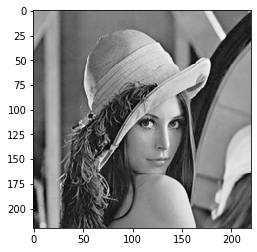

In [10]:
im = cv2.imread('pic_resources/lenna.png')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [11]:
ret, dis = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [17]:
# retval / 閾値を返してくれる
ret 

127.0

In [18]:
# dist　:　binary image / ２値化された　NumPy の Array が返ってくる
dis

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

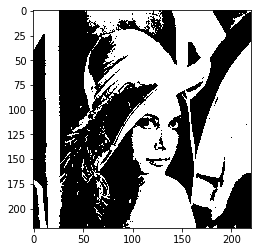

In [19]:
plt.imshow(dis, cmap='gray')

- 0 のところが黒,　255　のところが白

## 大津の２値化 ( Otsu's binarization )
- *大津さんが作ったアルゴリズム*
    - 閾値を自動で決定してくれる
    - 双峰性(bimodal)ヒストグラムに使える
        - 最頻値が２つある
        - 輝度値のヒストグラムで見ると２つの山が表示されているように見える


### 線形判別分析法
- *( LDA : Linear Discriminant Analysis)を画像に適用したアルゴリズム*
    - **2クラスの分類問題を解いている**
        - ２クラス分類を画像に使用したもの

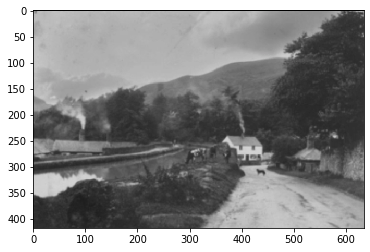

In [20]:
im = cv2.imread('pic_resources/bimodal_sample.png')
plt.imshow(im)

In [22]:
# im の画像は RGB なので注意
im.shape

(418, 635, 3)

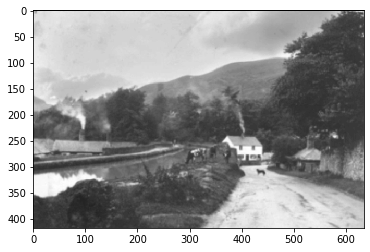

In [23]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [25]:
# グレースケールに変換
gray.shape

(418, 635)

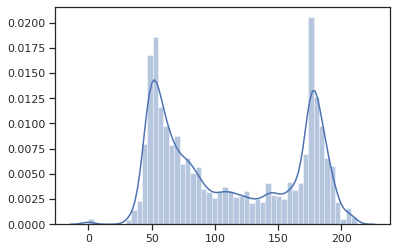

In [31]:
# ヒストグラム表示 / bimodal(双峰的) な　ヒストグラムになっている
sns.set(context='notebook', style='ticks')
sns.distplot(gray)

In [38]:
ret, dis = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [39]:
# Otsu binarization / 閾値を　Otsuのアルゴリズムで自動決定
ret

118.0

In [41]:
dis

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

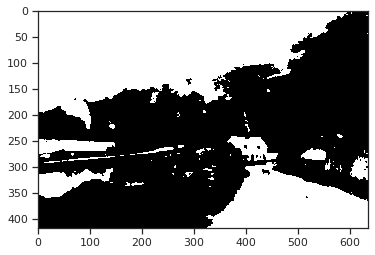

In [43]:
plt.imshow(dis, cmap='gray')

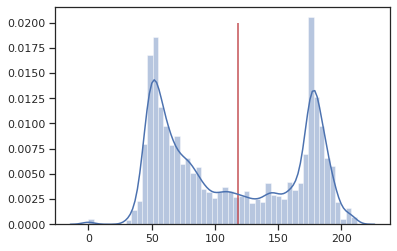

In [46]:
# ヒストグラム に　retvalu の値を入れて表示する
sns.set(context='notebook', style='ticks')
sns.distplot(gray)
plt.vlines(ret, 0, 0.02, 'r')              # 閾値 : x : y : color

- 変数に格納しておけばこのように閾値を確認することができる

## Adaptive Thresholding
- *一律に閾値を指定　(global thresholding) ものとは別の判別の仕方*
    - **指定した画像　window 内で閾値を指定して白黒にする**
        - **それを画像全体に適用する**
        

- 小さい window の中での平均輝度値を閾値にして２値化　->　これを画像全体に適用
    - *平均を閾値にしてしまうと文字がない箇所ではうまくいかない*
        - **実際には平均値から定数を引いた値を使う**
    

- 影で一律に閾値を設定してうまく２値化できない時
    - OCR(文字認識アルゴリズム)と組み合わせて使用する
        - text の認識などによく使用される

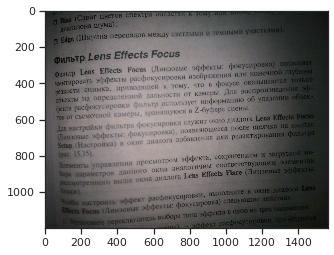

In [47]:
im = cv2.imread('pic_resources/text_pic.jpg')
plt.imshow(im)

In [51]:
# RGB なので注意
im.shape

(1200, 1562, 3)

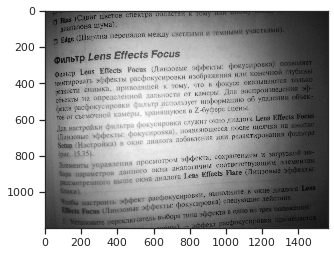

In [49]:
# グレースケールに直す
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [50]:
gray.shape

(1200, 1562)

In [54]:
dist = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 4)

In [55]:
dist

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

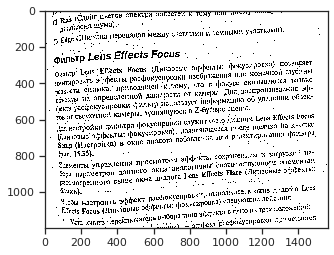

In [57]:
plt.imshow(dist, cmap='gray')